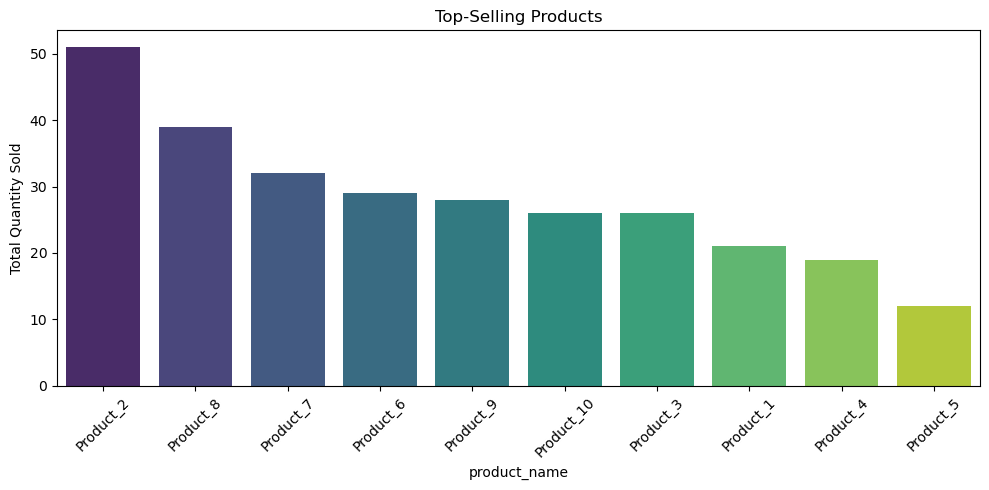

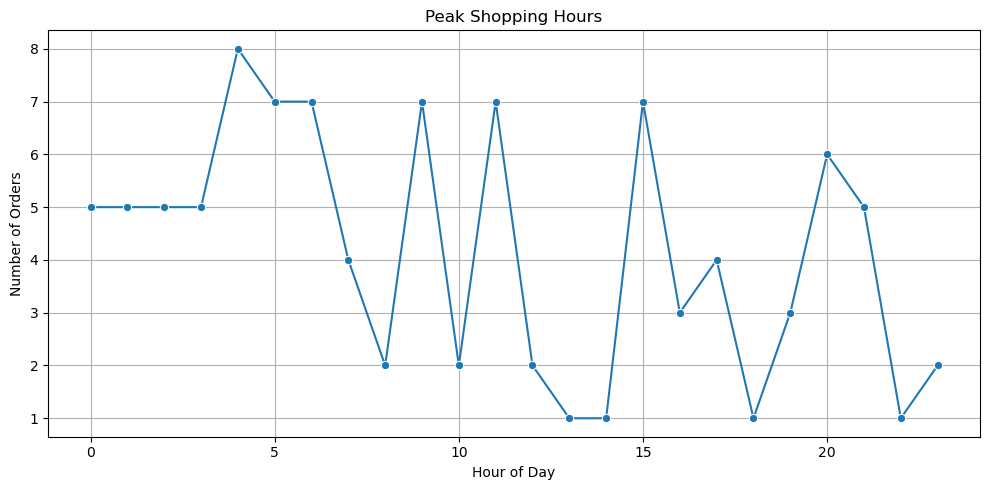

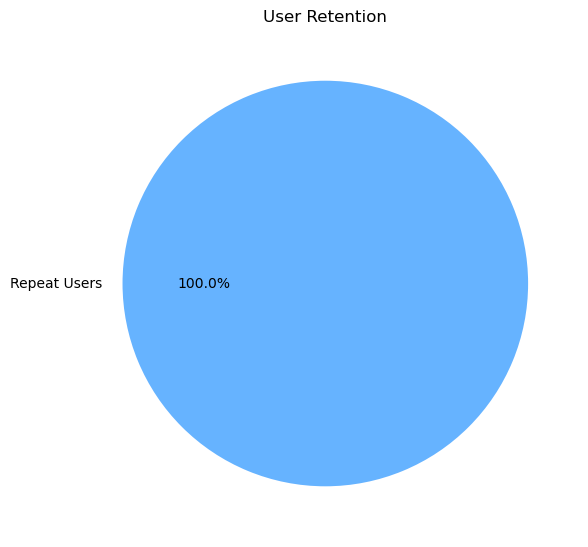

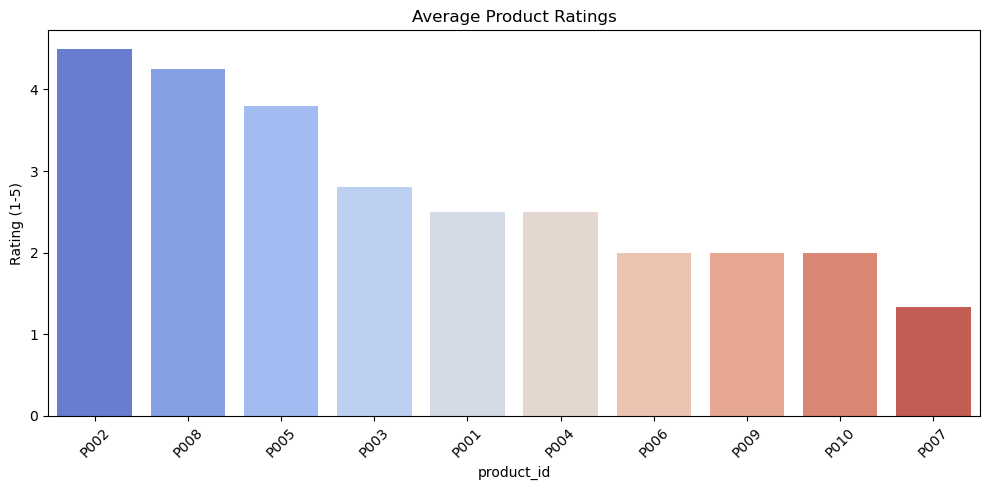

In [5]:
# E-Commerce Data Insights Project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import random

# Step 1: Generate Sample Data

np.random.seed(42)

# Products Data
product_ids = [f'P{i:03}' for i in range(1, 11)]
products = pd.DataFrame({
    'product_id': product_ids,
    'product_name': [f'Product_{i}' for i in range(1, 11)],
    'category': random.choices(['Electronics', 'Clothing', 'Books'], k=10),
    'price': np.random.randint(100, 1000, size=10)
})

# Users Data
user_ids = [f'U{i:03}' for i in range(1, 21)]
users = pd.DataFrame({
    'user_id': user_ids,
    'signup_date': pd.date_range(end=datetime.today(), periods=20).to_pydatetime(),
    'country': random.choices(['India', 'USA', 'UK'], k=20)
})

# Orders Data
order_data = []
for _ in range(100):
    order_data.append({
        'order_id': f'O{random.randint(1000, 9999)}',
        'product_id': random.choice(product_ids),
        'user_id': random.choice(user_ids),
        'quantity': random.randint(1, 5),
        'order_date': datetime.today() - timedelta(days=random.randint(0, 30), hours=random.randint(0, 23))
    })
orders = pd.DataFrame(order_data)
# Reviews Data
reviews = pd.DataFrame({
    'product_id': np.random.choice(product_ids, 30),
    'user_id': np.random.choice(user_ids, 30),
    'rating': np.random.randint(1, 6, 30),
    'review_text': ['Good' if r > 3 else 'Bad' for r in np.random.randint(1, 6, 30)]
})
# Step 2: Analysis and Visualization
# Merge Orders with Product Info
merged_orders = orders.merge(products, on='product_id')
# Top-Selling Products
product_sales = merged_orders.groupby('product_name')['quantity'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=product_sales.index, y=product_sales.values, palette='viridis')
plt.title('Top-Selling Products')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Peak Shopping Hours
orders['hour'] = orders['order_date'].dt.hour
hourly_sales = orders.groupby('hour').size()
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values, marker='o')
plt.title('Peak Shopping Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.tight_layout()
plt.show()
# User Retention (Fixed Error)
repeat_users = orders.groupby('user_id').size().reset_index(name='orders')
repeat_users['is_repeat'] = repeat_users['orders'] > 1
retention_data = repeat_users['is_repeat'].value_counts()
label_map = {True: 'Repeat Users', False: 'One-Time Users'}
labels = [label_map.get(i, str(i)) for i in retention_data.index]
plt.figure(figsize=(6, 6))
plt.pie(retention_data, labels=labels, autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
plt.title('User Retention')
plt.tight_layout()
plt.show()
# Average Product Rating
average_rating = reviews.groupby('product_id')['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=average_rating.index, y=average_rating.values, palette='coolwarm')
plt.title('Average Product Ratings')
plt.ylabel('Rating (1-5)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
